Результыты. 

1) Качество на cross-validation порядка 90-95 в зависимости от регуляризации. 

2) Гены из пути mTor регулярно попадают в важные признаки при разной регуляризации, разных моделях и разных разбиениях cv. 

3) Если использозовать для предсказания плюрипотентности только гены mTor, то f1 = 69, accuracy = 0.78, precision = 0.73, recall=75

In [14]:
import os
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import *
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
%matplotlib inline

Препроцессинг данных

In [4]:
df = pd.read_csv('new_table2.csv').T

Gen_ID = df[95:96]
df = df.drop(df.index[95])

target = []
for index in df.index:
    res_ev = re.search('_EV_', index)
    res_oskm = re.search('_OSKM_', index)
    if re.search('_EV_', index) != None:
        target.append(1)
    if re.search('_OSKM_', index) != None:
        target.append(0)

In [5]:
Gen_ID

,0,1,2,3,4,5,6,7,8,9,...,62151,62152,62153,62154,62155,62156,62157,62158,62159,62160
Gen_ID,ENSG00000223972,ENSG00000227232,ENSG00000243485,ENSG00000221311,ENSG00000237613,ENSG00000268020,ENSG00000240361,ENSG00000186092,ENSG00000238009,ENSG00000239945,...,ERCC-00157,ERCC-00158,ERCC-00160,ERCC-00162,ERCC-00163,ERCC-00164,ERCC-00165,ERCC-00168,ERCC-00170,ERCC-00171


In [6]:
logit_pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', C=0.1))

In [7]:
logit_pipe.fit(df, target)

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [8]:
cross_val_score(logit_pipe, df, target, cv=6, scoring='f1').mean()

0.85716135716135733

In [72]:
Cs = np.logspace(1, 3, 10)

In [73]:
estimator = GridSearchCV(logit_pipe, dict(logisticregression__C=Cs), verbose=1, error_score='f1')

In [74]:
estimator

GridSearchCV(cv=None, error_score='f1',
       estimator=Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': array([   10.     ,    16.68101,    27.82559,    46.41589,    77.42637,
         129.15497,   215.44347,   359.38137,   599.48425,  1000.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [75]:
estimator.fit(df, target)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   29.2s finished


GridSearchCV(cv=None, error_score='f1',
       estimator=Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': array([   10.     ,    16.68101,    27.82559,    46.41589,    77.42637,
         129.15497,   215.44347,   359.38137,   599.48425,  1000.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [76]:
estimator.cv_results_

{'mean_fit_time': array([ 0.61410133,  0.61544251,  0.65012574,  0.6397864 ,  0.62910628,
         0.72851038,  0.65046597,  0.71618183,  0.69415808,  0.70983601]),
 'mean_score_time': array([ 0.09073162,  0.09105857,  0.10306787,  0.09540184,  0.09440136,
         0.10240658,  0.09773151,  0.10707331,  0.09606854,  0.10474094]),
 'mean_test_score': array([ 0.92708333,  0.91666667,  0.89583333,  0.90625   ,  0.92708333,
         0.91666667,  0.90625   ,  0.9375    ,  0.92708333,  0.875     ]),
 'mean_train_score': array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]),
 'param_logisticregression__C': masked_array(data = [10.0 16.681005372000591 27.825594022071243 46.415888336127772
  77.426368268112697 129.15496650148839 215.44346900318823
  359.38136638046257 599.48425031894089 1000.0],
              mask = [False False False False False False False False False False],
        fill_value = ?),
 'params': ({'logisticregression__C': 10.0},
  {'logisticregression__C': 16.6810053720005

In [47]:
logit_best = make_pipeline(LogisticRegression(penalty='l1', C=1000))
logit_best.fit(df, target)
cross_val_score(logit_best, df, target, cv=6, scoring='f1').mean()

0.97222222222222221

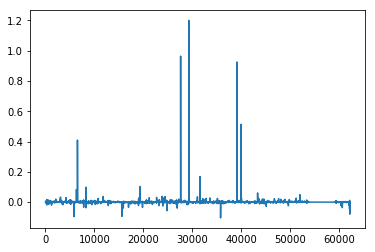

In [48]:
plt.plot(logit_best.steps[0][1].coef_[0])

In [49]:
mTor = list(pd.read_csv('mTOR_path.txt').columns)
mTor = [re.sub(' ', '', x) for x in mTor]

In [50]:
def best_genes(logit_coefs):
    best_logit_features = [x for x in logit_coefs if x != 0]
    best_logit_features_numbers = [list(logit_coefs).index(x) for x in best_logit_features]
    best_genes = [Gen_ID[x][0] for x in best_logit_features_numbers]
    return best_logit_features, best_logit_features_numbers, best_genes

def compare_with_mtor(best_genes, mtor_genes):
    return set(best_genes) & set(mtor_genes)

In [51]:
b_l, b_log_feachures, b_genes = best_genes(logit_best.steps[0][1].coef_[0])
print(len(b_genes))

5573


In [52]:
compare_with_mtor(b_genes, mTor)

{'ENSG00000023287',
 'ENSG00000063046',
 'ENSG00000067560',
 'ENSG00000072803',
 'ENSG00000075651',
 'ENSG00000085721',
 'ENSG00000100030',
 'ENSG00000105173',
 'ENSG00000106615',
 'ENSG00000108443',
 'ENSG00000108953',
 'ENSG00000116954',
 'ENSG00000118515',
 'ENSG00000119487',
 'ENSG00000126934',
 'ENSG00000132155',
 'ENSG00000134308',
 'ENSG00000136238',
 'ENSG00000140992',
 'ENSG00000150593',
 'ENSG00000151247',
 'ENSG00000154229',
 'ENSG00000155792',
 'ENSG00000155876',
 'ENSG00000161960',
 'ENSG00000164327',
 'ENSG00000164924',
 'ENSG00000166913',
 'ENSG00000167658',
 'ENSG00000169032',
 'ENSG00000170027',
 'ENSG00000172115',
 'ENSG00000175224',
 'ENSG00000176171',
 'ENSG00000187840',
 'ENSG00000198793',
 'ENSG00000204673',
 'ENSG00000213281'}

In [283]:
compare_with_mtor(b_genes, mTor)

{'ENSG00000067560',
 'ENSG00000108953',
 'ENSG00000134308',
 'ENSG00000164924',
 'ENSG00000170027'}

In [295]:
compare_with_mtor(b_genes, mTor)

{'ENSG00000067560',
 'ENSG00000100811',
 'ENSG00000128245',
 'ENSG00000134308',
 'ENSG00000136238',
 'ENSG00000151247',
 'ENSG00000155876',
 'ENSG00000164327',
 'ENSG00000164924',
 'ENSG00000166913',
 'ENSG00000170027',
 'ENSG00000172115'}

In [291]:
compare_with_mtor(b_genes, mTor)

{'ENSG00000067560',
 'ENSG00000100811',
 'ENSG00000106615',
 'ENSG00000134308',
 'ENSG00000136238',
 'ENSG00000151247',
 'ENSG00000164924',
 'ENSG00000166913',
 'ENSG00000170027',
 'ENSG00000172115'}

In [280]:
compare_with_mtor(b_genes, mTor)

{'ENSG00000067560',
 'ENSG00000100811',
 'ENSG00000106615',
 'ENSG00000132155',
 'ENSG00000134308',
 'ENSG00000136238',
 'ENSG00000164327',
 'ENSG00000164924',
 'ENSG00000166913',
 'ENSG00000170027',
 'ENSG00000172115'}

In [217]:
for_german = np.array([[g, w] for g, w in zip(b_genes, b_l)])

In [223]:
np.savetxt("Output1.csv", for_german)

TypeError: Mismatch between array dtype ('<U18') and format specifier ('%.18e %.18e')

In [211]:
len(b_genes) - len(b_l)

0

In [228]:
file = open('Output2.txt', 'w') 
file.write(str(for_german))

1123

In [162]:
df.columns

RangeIndex(start=0, stop=62161, step=1)

In [203]:
compare_with_mtor(b_genes, mTor)

set()

In [232]:
data = pd.read_csv('new_table2.csv').T

In [269]:
mtor_cols = []
for i in range(len(data.columns)):
    if data[i][95] in mTor:
        mtor_cols.append(i)

In [298]:
new_train = df[mtor_cols]

In [416]:
logit_pipe_new = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', C=0.4, class_weight='balanced'))

In [417]:
cross_val_score(logit_pipe_new, new_train, target, cv=7, scoring='recall').mean()

0.90714285714285714

In [421]:
Cs_new = np.logspace(-1, 1, 201)
estimator_new = GridSearchCV(logit_pipe, dict(logisticregression__C=Cs_new), verbose=1, scoring='recall')
estimator_new.fit(new_train, target)

Fitting 3 folds for each of 201 candidates, totalling 603 fits


[Parallel(n_jobs=1)]: Done 603 out of 603 | elapsed:    3.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': array([  0.1    ,   0.10233, ...,   9.77237,  10.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=1)

In [422]:
estimator_new.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=0.10000000000000001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [423]:
estimator_new.best_score_

0.75274621212121218

In [412]:
estimator_new.cv_results_

{'mean_fit_time': array([ 0.00333524,  0.00266345,  0.00366815,  0.00300916,  0.00233626,
         0.0023276 ,  0.00200796,  0.00200804,  0.00199517,  0.0016679 ,
         0.00200224,  0.00266274,  0.00233436,  0.002002  ,  0.00200232,
         0.00233642,  0.00233515,  0.00333627,  0.00234199,  0.00200192,
         0.00199517,  0.00200256,  0.00200915,  0.00200748,  0.00200192,
         0.00200192,  0.0020016 ,  0.00199477,  0.00200152,  0.00200184,
         0.00200168,  0.00200137,  0.00200144,  0.0020016 ,  0.00200208,
         0.00200129,  0.00200319,  0.00200168,  0.00200081,  0.0020016 ,
         0.00200184,  0.00200208,  0.00200137,  0.00200144,  0.00200176,
         0.00200121,  0.00200152,  0.00200152,  0.00200144,  0.00200057,
         0.00233475,  0.00200232,  0.00200176,  0.00233499,  0.00200256,
         0.00200184,  0.00266226,  0.00166845,  0.00234151,  0.00200137,
         0.00200137,  0.0020016 ,  0.00200137,  0.00200176,  0.00200192,
         0.00233547,  0.00200804, 